In [1]:
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 5.6 MB/s eta 0:00:01
     ----------------- ---------------------- 1.3/3.0 MB 3.7 MB/s eta 0:00:01
     --------------------------- ------------ 2.1/3.0 MB 4.3 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 4.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------------------------------ --------- 1.0/1.4 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-py3-none-any.wh


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Download Google (GOOG) stock price data
df = yf.download('GOOG', start='2010-01-01', end='2024-01-01')

# Use only the 'Close' price
data = df[['Close']]
data.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,GOOG
Date,
2010-01-04,15.536651
2010-01-05,15.468232
2010-01-06,15.078298
2010-01-07,14.727283
2010-01-08,14.923613


In [3]:
# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create training sequences
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Reshape input for RNN [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [4]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


C:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0251
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0021
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0021
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0019
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0021
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0015
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0016
Epoch 8/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0014
Epoch 9/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0013
Epoch 10/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0014


109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


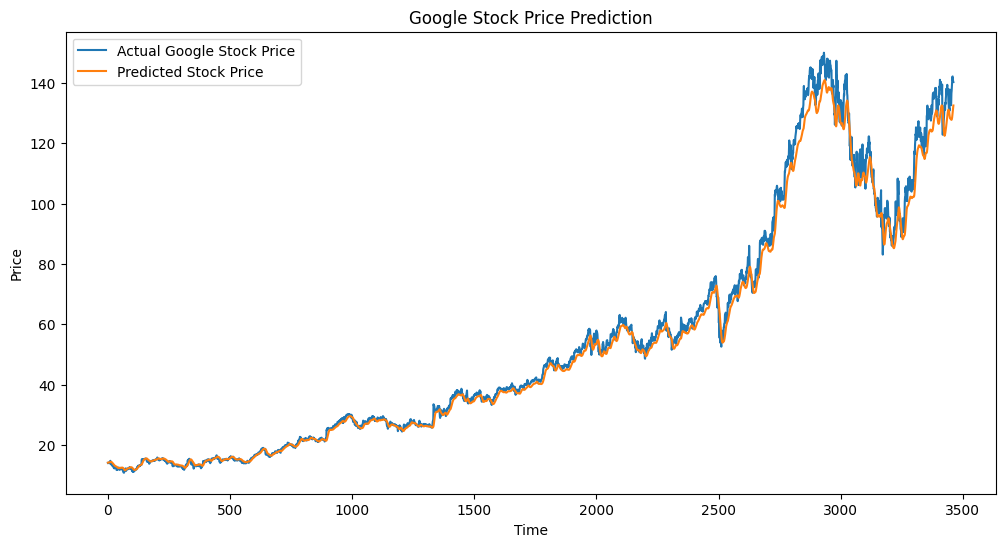

In [6]:
# Predict on training data (for simplicity)
predicted = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(real_prices, label='Actual Google Stock Price')
plt.plot(predicted_prices, label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [7]:
# Make predictions on training data
predicted = model.predict(X)

# Inverse transform to get actual price values
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y.reshape(-1, 1))

# Print a sample of actual vs predicted prices
for i in range(10):
    print(f"Actual: {real_prices[i][0]:.2f}, Predicted: {predicted_prices[i][0]:.2f}")


109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Actual: 14.06, Predicted: 14.15
Actual: 14.10, Predicted: 14.15
Actual: 14.15, Predicted: 14.16
Actual: 14.09, Predicted: 14.18
Actual: 13.97, Predicted: 14.21
Actual: 14.07, Predicted: 14.22
Actual: 14.04, Predicted: 14.23
Actual: 14.20, Predicted: 14.24
Actual: 14.55, Predicted: 14.26
Actual: 14.60, Predicted: 14.29


In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluate on training data (or test data if split)
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real_prices, predicted_prices)
r2 = r2_score(real_prices, predicted_prices)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 12.4330
Root Mean Squared Error (RMSE): 3.5260
Mean Absolute Error (MAE): 2.2329
R² Score: 0.9920
